In [249]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score

In [251]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [252]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [253]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

***Exploratory data analysis***

In [254]:
df = df[df['thal'] != 0]
df = df[df['age'] != 29]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [255]:
df['thal'] = df['thal'].replace(1, 'fixed defect')
df['thal'] = df['thal'].replace(2, 'normal')
df['thal'] = df['thal'].replace(3, 'reversable defect')
df['cp'] = df['cp'].replace(0, 'asymptomatic')
df['cp'] = df['cp'].replace(1, 'atypical angina')
df['cp'] = df['cp'].replace(2, 'non-anginal pain')
df['cp'] = df['cp'].replace(3, 'typical angina')
df['restecg'] = df['restecg'].replace(0, 'ventricular hypertrophy')
df['restecg'] = df['restecg'].replace(1, 'normal')
df['restecg'] = df['restecg'].replace(2, 'ST-T wave abnormality')
df['slope'] = df['slope'].replace(0, 'downsloping')
df['slope'] = df['slope'].replace(1, 'flat')
df['slope'] = df['slope'].replace(2, 'upsloping')
df['target'] = df['target'].replace(0, 'disease')
df['target'] = df['target'].replace(1, 'no disease')

In [256]:
temp = pd.get_dummies(df[['cp', 'restecg', 'slope', 'thal']])
df = df.join(temp, how='left')
df = df.drop(columns = ['cp','restecg', 'slope', 'thal'], axis=1)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_typical angina,restecg_ST-T wave abnormality,restecg_normal,restecg_ventricular hypertrophy,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2.3,0,no disease,...,1,0,0,1,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,no disease,...,0,0,1,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,no disease,...,0,0,0,1,0,0,1,0,1,0
3,56,1,120,236,0,178,0,0.8,0,no disease,...,0,0,1,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,no disease,...,0,0,1,0,0,0,1,0,1,0


In [257]:
df = df.drop(columns = ['restecg_ventricular hypertrophy', 'slope_upsloping', 'thal_fixed defect', 'cp_typical angina'], axis=1)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_asymptomatic,cp_atypical angina,cp_non-anginal pain,restecg_ST-T wave abnormality,restecg_normal,slope_downsloping,slope_flat,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2.3,0,no disease,0,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,0,no disease,0,0,1,0,1,1,0,1,0
2,41,0,130,204,0,172,0,1.4,0,no disease,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,no disease,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,no disease,1,0,0,0,1,0,0,1,0


no disease    163
disease       137
Name: target, dtype: int64

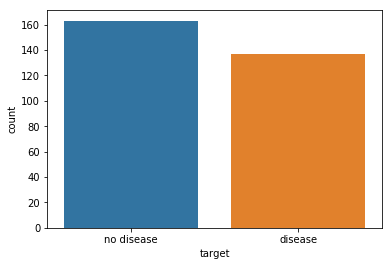

In [258]:
sns.countplot(df.target)
df.target.value_counts()

In [259]:
X = df.drop(['target'], axis=1)
Y = df['target']
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=0.2, random_state=0)

In [260]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()

In [261]:
rf.fit(train_features, train_labels)
dt.fit(train_features, train_labels)
lr.fit(train_features, train_labels)
knn.fit(train_features, train_labels)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [267]:
rf_pred = rf.predict(test_features)
dt_pred = dt.predict(test_features)
lr_pred = lr.predict(test_features)
knn_pred = knn.predict(test_features)
# rf_pred = rf.predict(train_features)
# dt_pred = dt.predict(train_features)
# lr_pred = lr.predict(train_features)
# knn_pred = knn.predict(train_features)

In [263]:
rf_prob = rf.predict_proba(test_features)[:,1]
dt_prob = dt.predict_proba(test_features)[:,1]
lr_prob = lr.predict_proba(test_features)[:,1]
knn_prob = knn.predict_proba(test_features)[:,1]

In [264]:
rf_prob

array([0.8, 0.2, 1. , 0.2, 0.3, 0.2, 0. , 0.2, 1. , 0.7, 0.7, 1. , 0. ,
       0. , 1. , 0.9, 0.3, 0.9, 0. , 0.2, 0. , 0.9, 0.8, 0.8, 0. , 1. ,
       0.8, 0. , 0.2, 0.5, 1. , 1. , 1. , 1. , 0.3, 0.8, 0. , 0.1, 0.6,
       0.7, 0.3, 0.3, 0.5, 0.6, 0.9, 0.6, 0.4, 0.9, 0.7, 1. , 1. , 0. ,
       0. , 1. , 0.9, 0.2, 0.3, 0.9, 0.9, 0.8])

In [266]:
print(classification_report(test_labels,rf_pred))
print('Random Forest:' + str(accuracy_score(test_labels, rf_pred)))
print(classification_report(test_labels,dt_pred))
print('Decision Tree:' + str(accuracy_score(test_labels, dt_pred)))
print(classification_report(test_labels,lr_pred))
print('Logistic Regression:' + str(accuracy_score(test_labels, lr_pred)))
print(classification_report(test_labels,knn_pred))
print('KNN:' + str(accuracy_score(test_labels, knn_pred)))

              precision    recall  f1-score   support

     disease       1.00      1.00      1.00       108
  no disease       1.00      1.00      1.00       132

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Random Forest:1.0
              precision    recall  f1-score   support

     disease       1.00      1.00      1.00       108
  no disease       1.00      1.00      1.00       132

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Decision Tree:1.0
              precision    recall  f1-score   support

     disease       0.88      0.81      0.85       108
  no disease       0.86      0.91      0.88       132

    accuracy                           0.87       240
   macro avg       0.87      0.86      0.86       240
weighted avg       0.87      0.87     